In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))


<Figure size 1000x600 with 0 Axes>

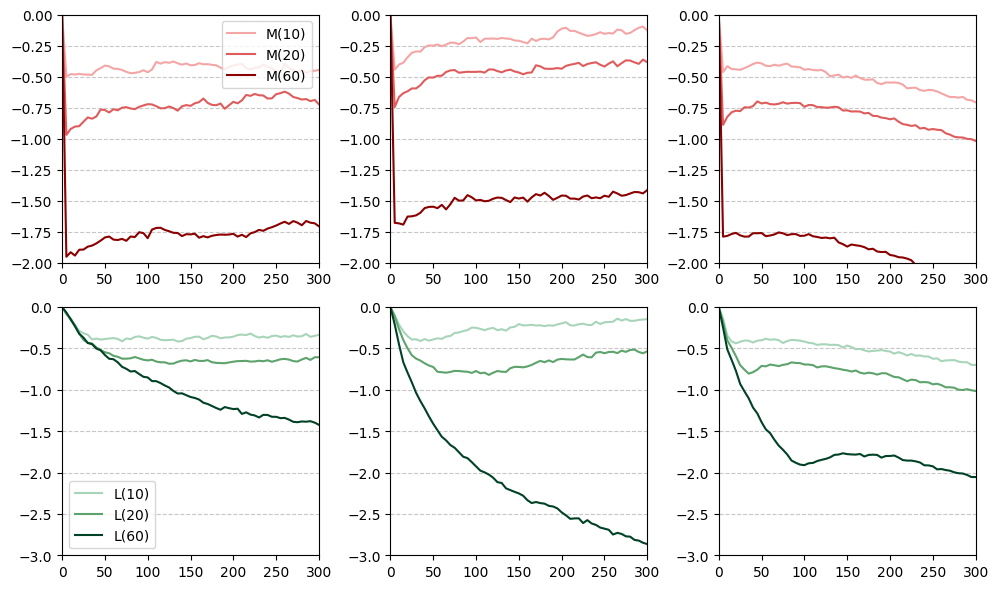

In [4]:

market = 'noise'
exp = 'market'
exp = 'limit'

plt.figure(figsize=(10, 6))
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
time = np.arange(0, 155, 5)
# for vol in [10, 20, 60]:
colors = ['#F4A6A6', '#E05C5C', '#8B0000']
# different shades of gree
colors = ['#A8D5BA', '#5CA36C', '#004225']
for i, market in enumerate(['noise', 'flow', 'strategic']):
    for j , exp in enumerate(['market', 'limit']):
        if exp == 'market':
            colors = ['#F4A6A6', '#E05C5C', '#8B0000']
        else: 
            colors = ['#A8D5BA', '#5CA36C', '#004225']       
        for vol, c in zip([10, 20, 60], colors):
            ax = axs[j, i]
            terminal_time = 300
            mid_prices = np.load(f'{parent_dir}/market_impact_study/{market}_{exp}_vol{vol}_{terminal_time}.npz')['mid_prices']
            mean_mid_prices = np.mean(mid_prices, axis=0)
            std_mid_prices = np.std(mid_prices, axis=0)    
            label = 'M' if exp == 'market' else 'L'
            time = np.arange(0, 305, 5)
            ax.plot(time, mean_mid_prices, label=f'{label}({vol})', color=c)
        if i==0 and j == 0:
            # set legend location for all subplots and tighten layout
            # for a in axs.flatten():
            ax.legend(loc='upper right')
        if j == 0:
            ax.set_ylim(-2.0, 0)
        if i == 0 and j == 1:
            ax.legend(loc='lower left')
        if j == 1:
            ax.set_ylim(-3, 0)
        # ax.set_xlim(0, 150)
        ax.set_xlim(0, 300)
        ax.grid(True, axis='y', linestyle= '--', alpha=0.7)

fig.tight_layout()
# plt.legend()
    
# for vol, color in zip([10, 20, 60], colors):
#     mean_mid_prices = np.mean(mid_prices['mid_prices'], axis=0)
#     std_mid_prices = np.std(mid_prices['mid_prices'], axis=0)    
#     plt.plot(time, mean_mid_prices, label=f'M({vol})', color=color)    
    # plt.fill_between(time, mean_mid_prices - std_mid_prices, mean_mid_prices + std_mid_prices, alpha=0.3, color=color)
    # plt.fill_between(time, mean_mid_prices - std_mid_prices, mean_mid_prices + std_mid_prices,color=color, )
    # color = plt.gca().lines[-1].get_color()
    # plt.errorbar(time, mean_mid_prices, yerr=std_mid_prices, fmt='none', alpha=0.6, capsize=3, elinewidth=1)
    # mid_prices = data['mid_prices']
    # mid_prices = np.mean(mid_prices, axis=0)    
    # plt.plot(time, mid_prices.T, label=f'{vol}', alpha=0.7)
# plt.legend()
# label = 'Market' if exp == 'market' else 'Limit'
# # plt.title(f'{label} order impact in {market} market')
# plt.xlabel('Time in seconds')
# plt.xlim(0, 150)
# plt.xticks(np.arange(0, 151, 10))
# plt.grid(True, axis='y', linestyle= '--', alpha=0.7)
# plt.tight_layout()
# plt.ylim(-2.0, 0)
# plt.ylabel('Mid price')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Mid price')

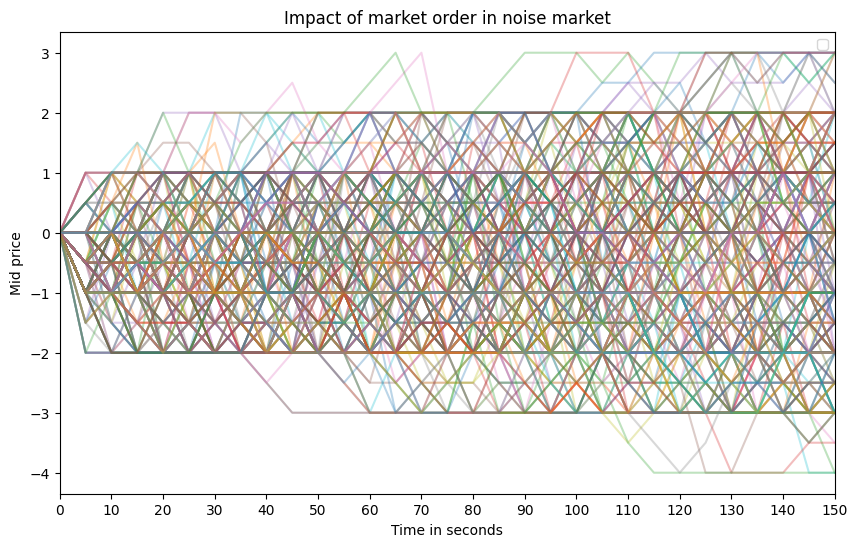

In [5]:
market = 'noise'
exp = 'market'

plt.figure(figsize=(10, 6))
time = np.arange(0, 155, 5)
# for vol in [10, 20, 60]:
vol = 10 
for n in range(500):
    mid_prices = np.load(f'{parent_dir}/market_impact_study/{market}_{exp}_vol{vol}_150.npz')
    mid_prices = mid_prices['mid_prices']
    mean_mid_prices = np.mean(mid_prices, axis=0)
    std_mid_prices = np.std(mid_prices, axis=0)    
    # color = 'red'
    plt.plot(time, mid_prices[n, :], alpha=0.3)
    # plt.plot(time, mean_mid_prices, label=f'M={vol}', alpha=0.9, color=color)    
    # plt.fill_between(time, mean_mid_prices - std_mid_prices, mean_mid_prices + std_mid_prices, alpha=0.2)
    # plt.fill_between(time, mean_mid_prices - std_mid_prices, mean_mid_prices + std_mid_prices,color=color, )
    # color = plt.gca().lines[-1].get_color()
    # plt.errorbar(time, mean_mid_prices, yerr=std_mid_prices, fmt='none', alpha=0.6, capsize=3, elinewidth=1)
    # mid_prices = data['mid_prices']
    # mid_prices = np.mean(mid_prices, axis=0)    
    # plt.plot(time, mid_prices.T, label=f'{vol}', alpha=0.7)
plt.legend()
plt.title(f'Impact of {exp} order in {market} market')
plt.xlabel('Time in seconds')
plt.xlim(0, 150)
plt.xticks(np.arange(0, 151, 10))
plt.ylabel('Mid price')

#############
generating plots for  noise


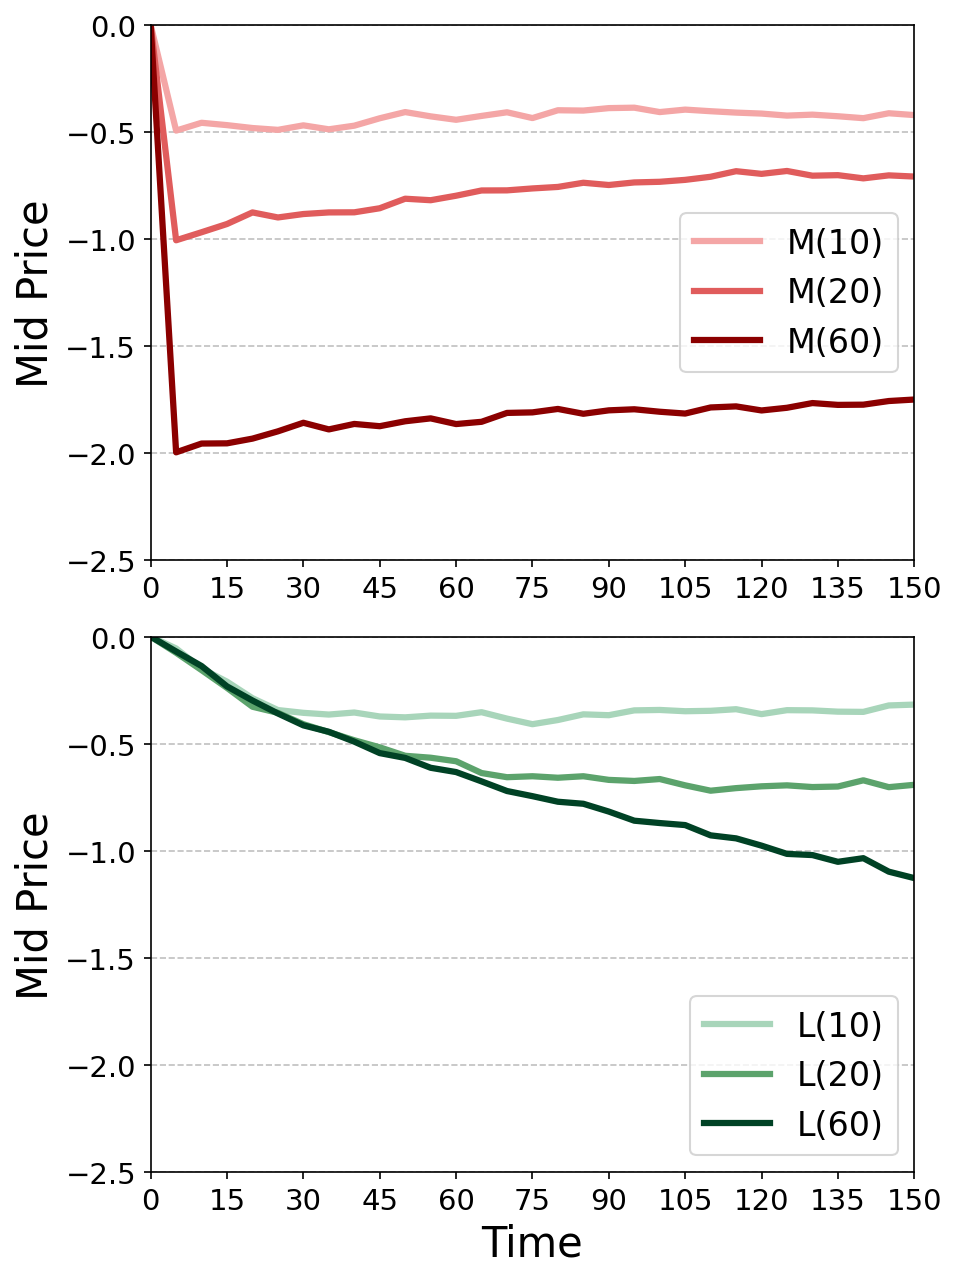

#############
generating plots for  flow


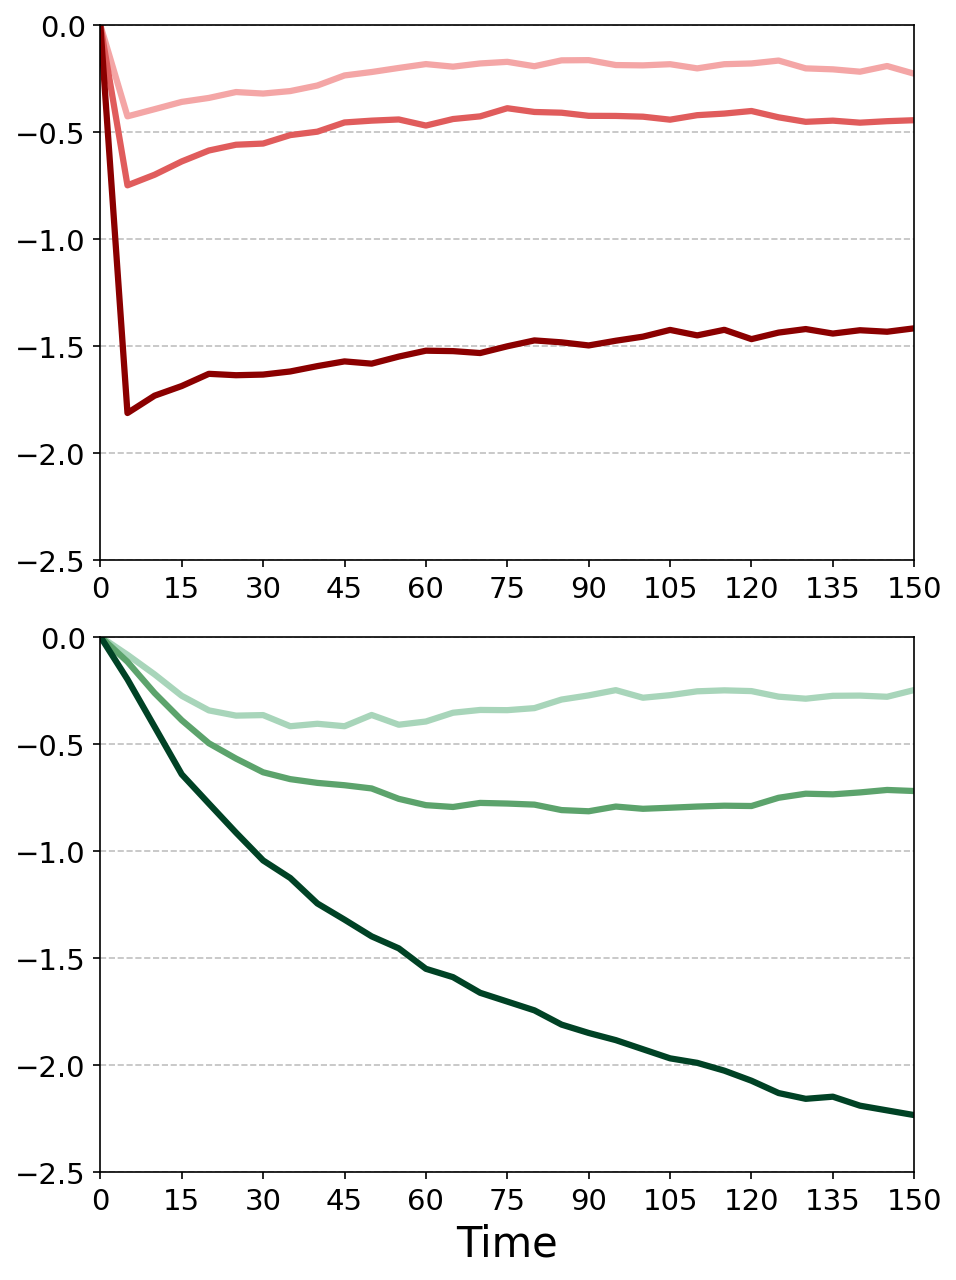

#############
generating plots for  strategic


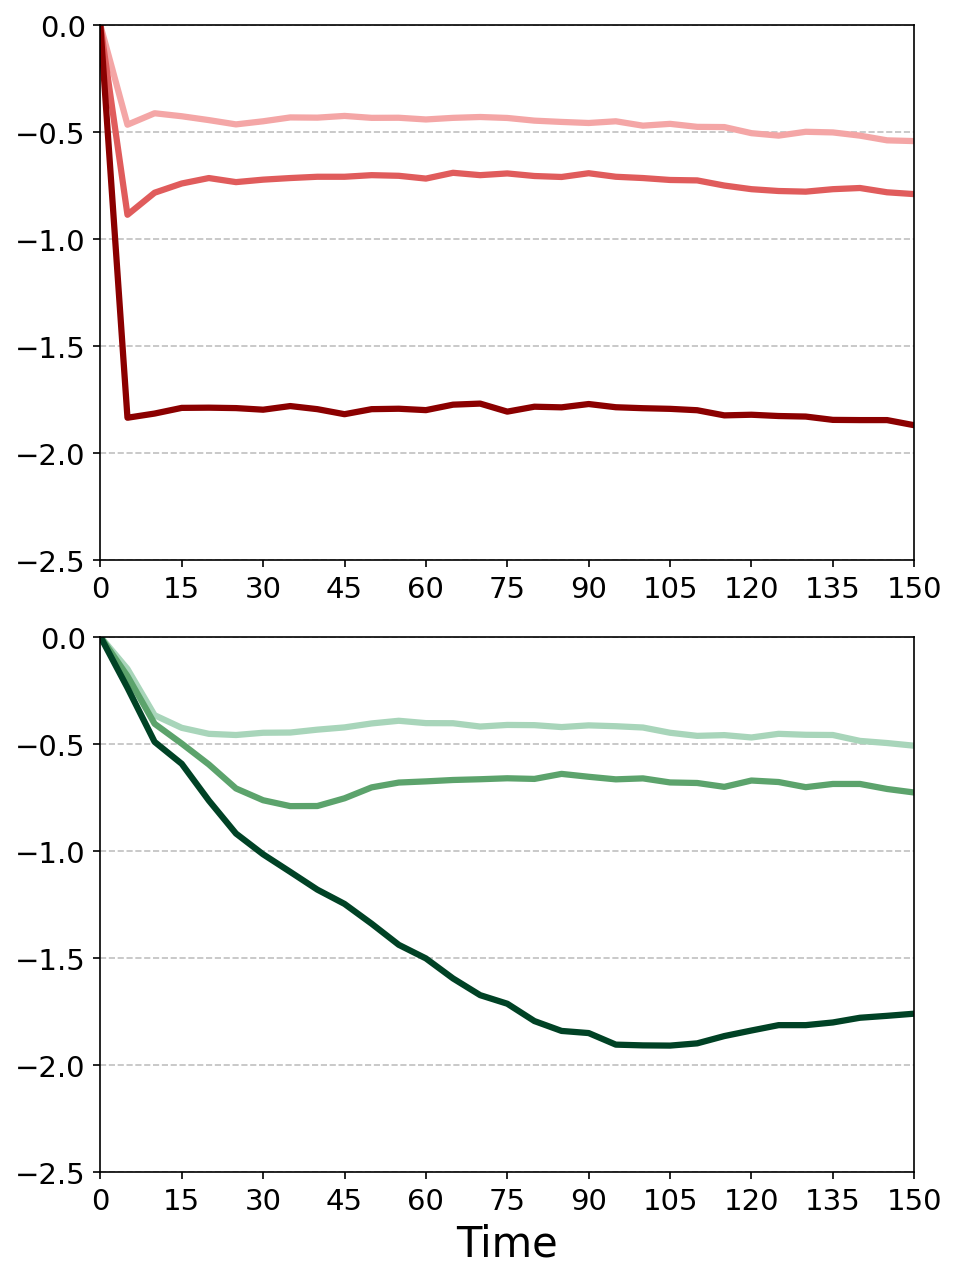

In [6]:
# import seaborn as sns
lots_list = [20, 60]
textwidth = 6.75
textheight = 9
scale = 3.2
lots_list = [10, 20, 60]


for i, env in enumerate(['noise', 'flow', 'strategic']):
    print('#############')
    print('generating plots for ', env)
    fig, axs = plt.subplots(2, 1, figsize=(scale*0.3*textwidth, scale*0.3*textheight), dpi=300)
    for j, exp in enumerate(['market', 'limit']): 
        if exp == 'market':
            colors = ['#F4A6A6', '#E05C5C', '#8B0000']
        else:
            colors = ['#A8D5BA', '#5CA36C', '#004225']
        for vol, c in zip(lots_list, colors):
            ax = axs[j]
            path = f'{parent_dir}/market_impact_study/{env}_{exp}_vol{vol}_150.npz'
            mid_prices = np.load(path)['mid_prices']
            mean_mid_prices = np.mean(mid_prices, axis=0)
            std_mid_prices = np.std(mid_prices, axis=0)    
            label = 'M' if exp == 'market' else 'L'
            time = np.arange(0, 155, 5)
            ax.plot(time, mean_mid_prices, label=f'{label}({vol})', color=c, linewidth=3)
            ax.set_xticks(np.arange(0, 155, 15))
            ax.set_xlim(0, 150)
            if env == 'noise' and exp == 'market':   
                ax.legend(prop={'size': 16}, loc='center right')
            if env == 'noise' and exp == 'limit':
                ax.legend(prop={'size': 16}, loc='lower right')
            if exp == 'limit':
                ax.set_xlabel('Time', fontsize=20)
            if env == 'noise':
                ax.set_ylabel('Mid Price', fontsize=20)
            else:
                ax.set_ylabel('')
            if exp == 'market':
                ax.set_ylim(-2.0, 0.0)
            if exp == 'limit':
                ax.set_ylim(-2.5, 0.0)
            tick_size = 14
            ax.tick_params(axis='x', labelsize=tick_size)
            ax.tick_params(axis='y', labelsize=tick_size)
            ax.grid(axis='y', linestyle='--', alpha=0.8)
            ax.set_yticks(np.arange(-2.5, 0.5, 0.5))
    fig.set_dpi(150)
    plt.tight_layout()
    plt.savefig(f'{parent_dir}/plots/impact_{env}.pdf')
    plt.show()